## Introduction 

The rapid growth of supermarkets coupled with increased awareness of low fat food during the 1960s marked the time where sales of the product would be influenced on various factors and not just the product name. By 1980s the supermarkets had led to decreased number and sales made by the grocery store. Here we have sales data of 1559 product across 10 stores in different cities. There are various factors relating to the store and the product given to us with an aim to predict sales of the product at a store. We will try to first understand the data given to us, pre-process the data and perform analysis to further understand the factors affecting the sales of the product. We will then build a predictive model to predict the sales amount based on factors we defined during analysis. 


## Understanding the Dataset

Here, I have used a kaggle dataset of Big Mart Sales: https://www.kaggle.com/nishanta/big-mart-sales/data.  The dataset is divided into test and test csv files.

Big mart Sales data has data of 1559 items sold by 10 outlets over the course of time along with the details of product and the store. 

The product details include details like:
1. Item weight: specifies the weight of the item 
2. Item_Fat_Content: a product is classified into two broad categories of depending on the fat content in the product- low-fat and normal fat product
3. Item_Visibility: it gives us the visibility rate of the product in each store with 0 being the value of no product visibility to 1 being the value of product placed at easily available location
4. Item_MRP: showing the MRP of the product without any store discounts applied

The store details include:
1. Outlet_Establishment year: Year in which the outlet is established with years ranging from 1985 to 2010
2. Outlet_Size: gives us details on the size of the store; small, medium and large being the values
3. Outlet_Location_Type: gives us an idea of where the outlet is located, whether it's a town, city or village area
4. Outlet_type: classifies the oulet to supermarkets and grocery store

We also have sales made by each store on the product 

## Data pre-processing

Any data analysis first involves the understanding of data, removing any anamolies and finding suitable values to replace the null values. We also have to check the minimum and maximum for the vairables holding continous values and anamolies in the values for variables holding dicrete values. 

In [1]:
#import the general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

I will combine the datasets so that the data pre-processing can be completed on both, test and train dataset without any discrepancy and also avoiding the repeatation of the steps for different datasets.

In [3]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
dataset = pd.concat([train, test],ignore_index=True)

#### Step 1 of pre-processing: Dealing with missing data in the dataset
First step Dealing with missing data: Knowing the number of missing values.

We will use .isnull() and sum() method to know the number of missing values in the dataset

In [4]:
#Check missing values
dataset.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

Here, ignore the number of values missing in Item_Outlet_Sales as it has the missing values in test set which we have to predict using a predictive model after the analysis.Now, we have 2439 weight values and 4016 outlet_size values missing.

In [5]:
#Checking the number of unique values in each column
dataset.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

In [6]:
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


We replace the categorical missing values by the mode value of the column and continous missing values by the mean value of the column. We can replace the values using either imputer library from pre-processing package of python or by simply using fillna() function of pandas to fill the null values with the mean and mode values

In [7]:
#Replacing the missing outlet_size values with the mode value
outlet_size_mode = dataset['Outlet_Size'].value_counts().idxmax()
dataset = dataset.fillna({"Outlet_Size": "Medium"})

#Fill the na values with item_weight by the mean value of item_weight
mean_weight = dataset['Item_Weight'].mean()
dataset = dataset.fillna({"Item_Weight": mean_weight})

I would have considered replacing the item_weights with the mean of respective products item_weight but after exploring the dataset with weights, I observed all the individual products had the same weight and hence here the weight of the product doesn't have any or has least contribution to the sales amount and hence, considered saving time 

In [8]:
#Check missing values after filling the missing values with mode and median
dataset.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [9]:
#Numerical data summary:
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.234226,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,9.300000,1987.000000
50%,142.247000,1794.331000,0.054021,12.792854,1999.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


#### Step 2 of pre-processing: Removing the anamolies from the dataset

From the above summary of data, we observe that the Item_Visibility is 0 for some Items but that typically cannot be the case since the item is being sold so it is somewhere visible in the store. Hence we replace the 0 values in Item_Visibility by the mean of Item_Visibility

In [10]:
#Replace the zero value of visibility to the mean
mean_visibility = dataset['Item_Visibility'].mean()
dataset['Item_Visibility'] = dataset["Item_Visibility"].replace(0,mean_visibility)

In [11]:
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.070034,12.792854,1997.830681
std,62.086938,1706.499616,0.048602,4.234226,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000
25%,94.012000,834.247400,0.033143,9.300000,1987.000000
50%,142.247000,1794.331000,0.062347,12.792854,1999.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


We will now check the categorical variables and their values. The columns with categorical value are :
1. Item_Type  
2. Outlet_Identifier              
3. Outlet_Location_Type           
4. Outlet_Size                    
5. Outlet_Type 
6. Item_Fat_Content

We will just focus Outlet_Location_Type, Outlet_Size, Outlet_Type, Item_Fat_Content

In [12]:
columns = ['Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Fat_Content']
for col in columns:
    print (col)
    print (dataset[col].value_counts())

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Outlet_Size
Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Focusing on the anomalies in categorical variable we observe that the data in Item_Fat_Content have different ways of writing values with the same meaning. 

We will here replace the same meaning words with one of the values in Item_Fat_Content so as to remove any anamolies during the analysis, that is, use Low Fat for LF and low fat and Regular for reg 

In [13]:
#use .replace to replace LF, low fat to one category of Low Fat and same applies for reg to Regular 
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace(['reg'], 'Regular')

The Items are categorized as only low fat or regular based on Item Fat Content but we have products which fall in the category of household products, health and hygiene and others which does not have fat content related to it.

So, I have added another category into Item_Fat_Content and that is non-edible. We will replace the Item_Fat_Content for health and hygiene, household and others Item_Type to non-edible. This would further help us analyzing how the products are sold and thus impacting their sales 

In [14]:
dataset.loc[dataset['Item_Type']=='Health and Hygiene','Item_Fat_Content'] = "Non-Edible"
dataset.loc[dataset['Item_Type']=="Household",'Item_Fat_Content'] = "Non-Edible"
dataset.loc[dataset['Item_Type']=="Others",'Item_Fat_Content'] = "Non-Edible"

In [15]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


### Understanding the Item_Outlet_Sales and Item_MRP

In [16]:
Sales_distribuition = train

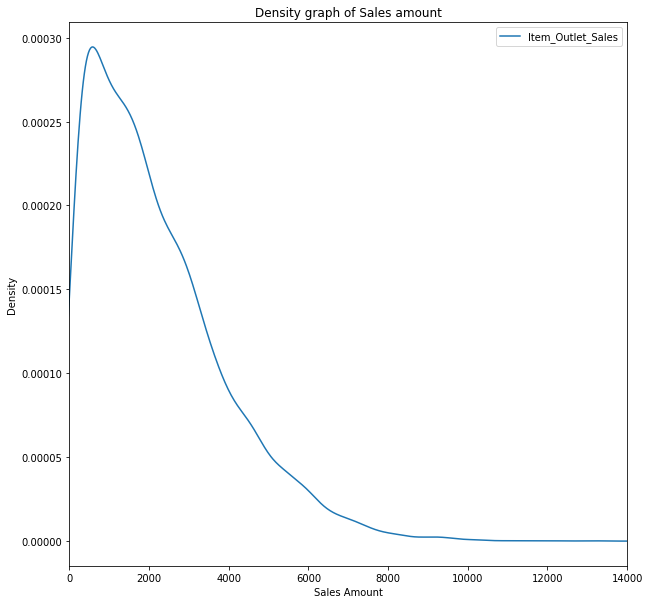

Mean of Sales:
Item_Outlet_Sales    2181.288914
dtype: float64
Standard deviation of Sales:
Item_Outlet_Sales    1706.499616
dtype: float64


In [17]:
combined_data = pd.DataFrame(Sales_distribuition[['Item_Outlet_Sales']])
combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(0,14000), title='Density graph of Sales amount')
plt.xlabel('Sales Amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Sales:')
print (combined_data.mean())
print ('Standard deviation of Sales:')
print (combined_data.std())

We observe that the Item_Outlet_Sales is right skewed with a mean of 2181 and the sales ranging from 30 to 14000

In [21]:
MRP_distribution = train

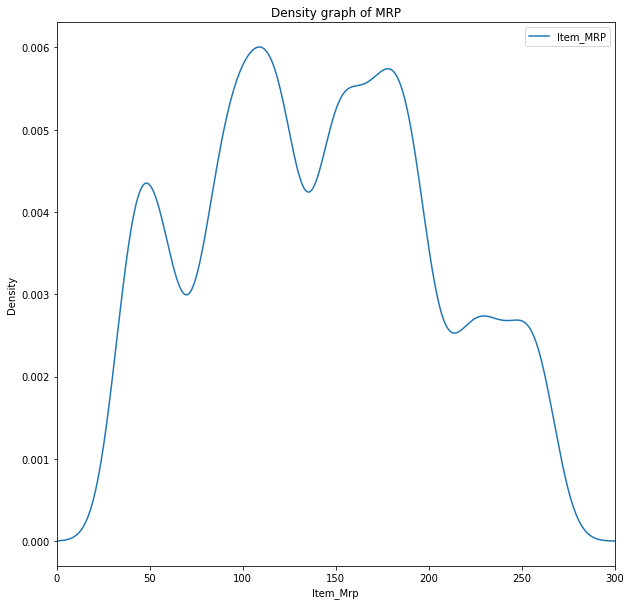

Mean of MRP:
Item_MRP    140.992782
dtype: float64
Standard deviation of MRP:
Item_MRP    62.275067
dtype: float64


In [22]:
combined_data = pd.DataFrame(MRP_distribution[['Item_MRP']])
combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(0,300), title='Density graph of MRP')
plt.xlabel('Item_Mrp')
plt.ylabel('Density')
plt.show()

print ('Mean of MRP:')
print (combined_data.mean())
print ('Standard deviation of MRP:')
print (combined_data.std())

The density graph of MRP shows a distribution with varying range in price of the item

## Performing Analysis 

We will perform some analysis and make any necessary changes into the dataset for further predicting the sales of the store. Thinking about the factors we have in the dataset, the factors according to me which influence the sales are:
1. Item_Fat_Content
2. item_Type
3. Outlet_Location_Type
4. Outlet_Type
5. Outlet_Establishment_Year

Now, I would consider performing analysis on the basis of above factors and decide further on how much does each value in each attribute makes  a contribution towards sales

I preferred to take outlet_type over outlet_size for the analysis, taking into consideration the fact that we had null values for outlet_size and we have taken up the mode value for the nulls and this can influence the results of analysis.

#### Factor 1: Item_Fat_Content

In [23]:
Fat_Content_Sales = dataset

In [24]:
Fat_Content_Sales = dataset.loc[dataset['source'] == 'train']

Sales by Fat Content is
                  Item_Outlet_Sales
Item_Fat_Content                   
Low Fat                8.477883e+06
Non-Edible             3.426211e+06
Regular                6.687031e+06


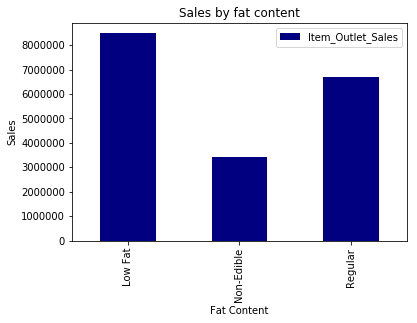

In [25]:
Content_Sales = Fat_Content_Sales.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy', title='Sales by fat content')
print ('Sales by Fat Content is')
print (Content_Sales)
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.show()

We here observe that the low fat products contributes more to the sales compared to the regular fat comprising products. It can be because the low fat products have lower prices compared to the regular products and hence are being purchased more. We will check the sum of MRP for low fat products and regular fat products to know the insights of it.

Sales by Fat Content is
                     Item_MRP
Item_Fat_Content             
Low Fat           549865.4226
Non-Edible        226454.2558
Regular           425361.8024


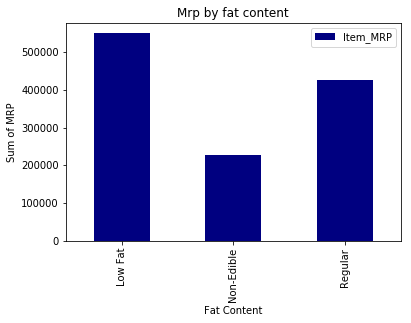

In [27]:
Content_Sales = Fat_Content_Sales.groupby(['Item_Fat_Content'])[['Item_MRP']].sum()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Mrp by fat content')
plt.xlabel('Fat Content')
plt.ylabel('Sum of MRP')
print ('Sales by Fat Content is')
print (Content_Sales)
plt.show()

We observe that the sum of MRP's of the Low fat products is almost double compared to the sum of regular fat products. We can say that the low fat products definitely add a lot to the Sales_amount compared to the regular fat product. 

Let us check the count of low fat and regular fat product being sold to analyse whether it is just the price that adds to the sale or the low fat products are actually being sold in larger quantity compared to the regular fat products.

Count by Fat Content is
                  Item_Fat_Content
Item_Fat_Content                  
Low Fat                       3918
Non-Edible                    1599
Regular                       3006


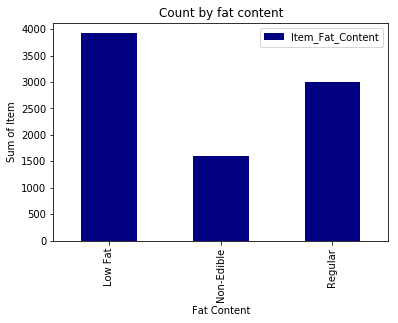

In [28]:
Content_Sales = Fat_Content_Sales.groupby(['Item_Fat_Content'])[['Item_Fat_Content']].count()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Count by fat content')
plt.xlabel('Fat Content')
plt.ylabel('Sum of Item')
print ('Count by Fat Content is')
print (Content_Sales)
plt.show()

Hence, after three different analysis, we can say low fat products are being sold in large quantity followed by regular fat products with household products being purchased the least.

#### Factor2: Item_Type contribution towards the sales

Sales by Item_type is
                       Item_Outlet_Sales
Item_Type                               
Baking Goods                1.265525e+06
Breads                      5.532372e+05
Breakfast                   2.322990e+05
Canned                      1.444151e+06
Dairy                       1.522594e+06
Frozen Foods                1.825735e+06
Fruits and Vegetables       2.820060e+06
Hard Drinks                 4.577934e+05
Health and Hygiene          1.045200e+06
Household                   2.055494e+06
Meat                        9.175656e+05
Others                      3.255176e+05
Seafood                     1.488682e+05
Snack Foods                 2.732786e+06
Soft Drinks                 8.928977e+05
Starchy Foods               3.514013e+05


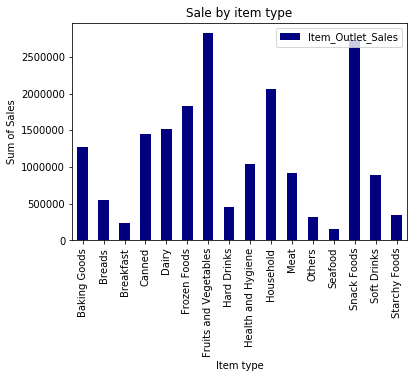

In [29]:
Content_Sales = Fat_Content_Sales.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
Content_Sales = Content_Sales.sort_index()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Sale by item type')
plt.xlabel('Item type')
plt.ylabel('Sum of Sales')
print ('Sales by Item_type is')
print (Content_Sales)
plt.show()

Sales by Item type is
                       Item_Type
Item_Type                       
Baking Goods                 648
Breads                       251
Breakfast                    110
Canned                       649
Dairy                        682
Frozen Foods                 856
Fruits and Vegetables       1232
Hard Drinks                  214
Health and Hygiene           520
Household                    910
Meat                         425
Others                       169
Seafood                       64
Snack Foods                 1200
Soft Drinks                  445
Starchy Foods                148


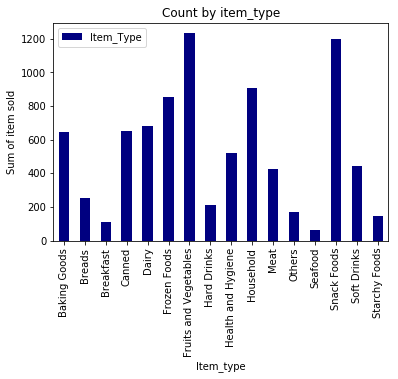

In [32]:
Content_Sales = Fat_Content_Sales.groupby(['Item_Type'])[['Item_Type']].count()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Count by item_type')
plt.xlabel('Item_type')
plt.ylabel('Sum of item sold')
print ('Sales by Item type is')
print (Content_Sales)
plt.show()

Taking into consideration not just sale amount but also the count of Item_Type, Fruits and Vegetables, Snack Foods and Household are the top three contributors to the Total sale 

#### Factor 3: Outlet_Location_Type and Outlet_Type

Number of outlets are
                      Outlet_Location_Type
Outlet_Location_Type                      
Tier 1                                2388
Tier 2                                2785
Tier 3                                3350


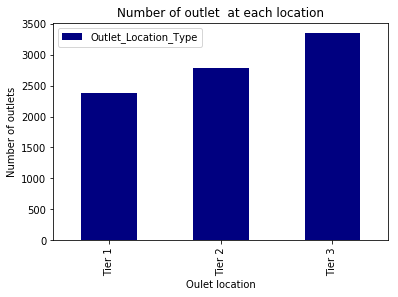

In [33]:
Content_Sales = Fat_Content_Sales.groupby(['Outlet_Location_Type'])[['Outlet_Location_Type']].count()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Number of outlet  at each location')
plt.xlabel('Oulet location')
plt.ylabel('Number of outlets')
print ('Number of outlets are')
print (Content_Sales)
plt.show()

We do not have any clearity on what tier 1, 2 and 3 represent in the dataset but we can consider saying that tier 3 is a larger city with more population and hence has higher contribution towards the sale

Sales by Location and type are
                                        Item_Outlet_Sales
Outlet_Location_Type Outlet_Type                         
Tier 1               Grocery Store           1.796941e+05
                     Supermarket Type1       4.302365e+06
Tier 2               Supermarket Type1       6.472314e+06
Tier 3               Grocery Store           1.883402e+05
                     Supermarket Type1       2.142664e+06
                     Supermarket Type2       1.851823e+06
                     Supermarket Type3       3.453926e+06


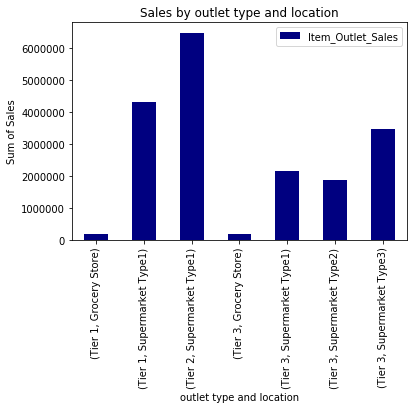

In [34]:
Content_Sales = Fat_Content_Sales.groupby(['Outlet_Location_Type', 'Outlet_Type'])[['Item_Outlet_Sales']].sum()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Sales by outlet type and location')
plt.xlabel('outlet type and location')
plt.ylabel('Sum of Sales')
print ('Sales by Location and type are')
print (Content_Sales)
plt.show()

The above graphs gives us a clear insight of sales made by each outlet_type in each Outlet_Location

#### Factor 4: Outlet_Eastablishment_Year

Sales by year of establishment
                           Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                            3.633620e+06
1987                            2.142664e+06
1997                            2.118395e+06
1998                            1.883402e+05
1999                            2.183970e+06
2002                            2.036725e+06
2004                            2.268123e+06
2007                            2.167465e+06
2009                            1.851823e+06


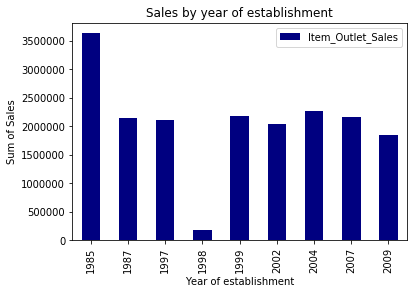

In [35]:
Content_Sales = dataset.groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].sum()
Content_Sales_plot = Content_Sales.plot(kind='bar', color='navy',title='Sales by year of establishment')
plt.xlabel('Year of establishment')
plt.ylabel('Sum of Sales')
print ('Sales by year of establishment')
print (Content_Sales)
plt.show()

Considering oulet establishment year for sales would not be a suitable rather we should consider writing it more systematically by using number of years the oulet has been in the market. The older the outlet, higher the probability of the outlet to generate more sales due to the trust built with it's customers. 

We don't have a clear information on when this data was collected and hence we will take year 2010 for now to find the number of years the outlet has served and built the trust with its customers.

In [35]:
#Years the outlet has been serving
dataset['Outlet_Years'] = 2010 - dataset['Outlet_Establishment_Year']

We now have a dataset with no anamolies and null values, we infact have a better understanding of dataset and the factors influencing the sales

In [36]:
dataset.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,11
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,1
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,11
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,12
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.065953,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,23


In [37]:
dataset = dataset[['Item_Fat_Content', 'Item_Type', 'Item_MRP', 'Item_Visibility', 'Outlet_Location_Type',  'Outlet_Type', 'Outlet_Years', 'Item_Outlet_Sales', 'source']]

In [38]:
dataset.head()

,Item_Fat_Content,Item_Type,Item_MRP,Item_Visibility,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Outlet_Sales,source
0,Low Fat,Dairy,249.8092,0.016047,Tier 1,Supermarket Type1,11,3735.1380,train
1,Regular,Soft Drinks,48.2692,0.019278,Tier 3,Supermarket Type2,1,443.4228,train
2,Low Fat,Meat,141.6180,0.016760,Tier 1,Supermarket Type1,11,2097.2700,train
3,Regular,Fruits and Vegetables,182.0950,0.065953,Tier 3,Grocery Store,12,732.3800,train
4,Non-Edible,Household,53.8614,0.065953,Tier 3,Supermarket Type1,23,994.7052,train


## Data pre-processing reloaded

Data pre-processing also involves encoding the categorical values to help us in building the predictive model. These values are then converted into much suitable format for predictive model using One-Hot encoder or get dummies. 

In [39]:
#Preprocess the data-encoding using Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
dataset.iloc[:, 0] = labelencoder_X.fit_transform(dataset.iloc[:, 0])
dataset.iloc[:, 1] = labelencoder_X.fit_transform(dataset.iloc[:, 1])
dataset.iloc[:, 4] = labelencoder_X.fit_transform(dataset.iloc[:, 4])
dataset.iloc[:, 5] = labelencoder_X.fit_transform(dataset.iloc[:, 5])


In [40]:
#apply one hot encoding
dataset = pd.get_dummies(dataset, columns=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type'])

Now, we have our final dataset for building a model

In [41]:
dataset.head()

,Item_MRP,Item_Visibility,Outlet_Years,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,249.8092,0.016047,11,3735.1380,train,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,48.2692,0.019278,1,443.4228,train,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,141.6180,0.016760,11,2097.2700,train,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,182.0950,0.065953,12,732.3800,train,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,53.8614,0.065953,23,994.7052,train,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [42]:
#Divide into test and train:
train_modified = dataset.loc[dataset['source']=="train"]
test_modified = dataset.loc[dataset['source']=="test"]

In [43]:
train_modified.to_csv("modified_train.csv")
test_modified.to_csv("modified_test.csv")

### Future work on Analysis:
    I have not taken into consideration the statistical analysis of dataset, that is testing the hypothesis and proportion. For future, we can test the variables that we have taken into consideration from the dataset for out model using the hypothesis testing to understand whether the factors taken into consideration are correct and proportion testing to better know the proportion of sale influenced by each factor. 